## Observations and Insights 

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Study_dataset = pd.merge(mouse_metadata,study_results, how= "left", on="Mouse ID")

# Display the data table for preview
Study_dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice.
Study_dataset["Mouse ID"].value_counts()

g989    13
e476    10
u327    10
t724    10
o926    10
        ..
v199     1
t573     1
x226     1
b447     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [13]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = Study_dataset.loc[Study_dataset.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [14]:
# Optional: Get all the data for the duplicate mouse ID. 
Study_dataset.loc[Study_dataset["Mouse ID"] == "g989",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataset = Study_dataset[Study_dataset["Mouse ID"].isin(duplicate_mice) == False]
clean_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
# Checking the number of mice in the clean DataFrame.
clean_dataset["Mouse ID"].value_counts()

e476    10
j913    10
l661    10
c139    10
j989    10
        ..
l872     1
d133     1
o848     1
x226     1
b447     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
Regimen_df = clean_dataset.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = Regimen_df["Tumor Volume (mm3)"].mean()
median = Regimen_df["Tumor Volume (mm3)"].median()
variance = Regimen_df["Tumor Volume (mm3)"].var()
Standard_deviation = Regimen_df["Tumor Volume (mm3)"].std()
SEM = Regimen_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
Summary_statistics = pd.DataFrame({"mean":mean, "median":median, "variance":variance, "Standard Deviation":Standard_deviation, "SEM":SEM})
Summary_statistics

,mean,median,variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Measurements per Drug Regimen')

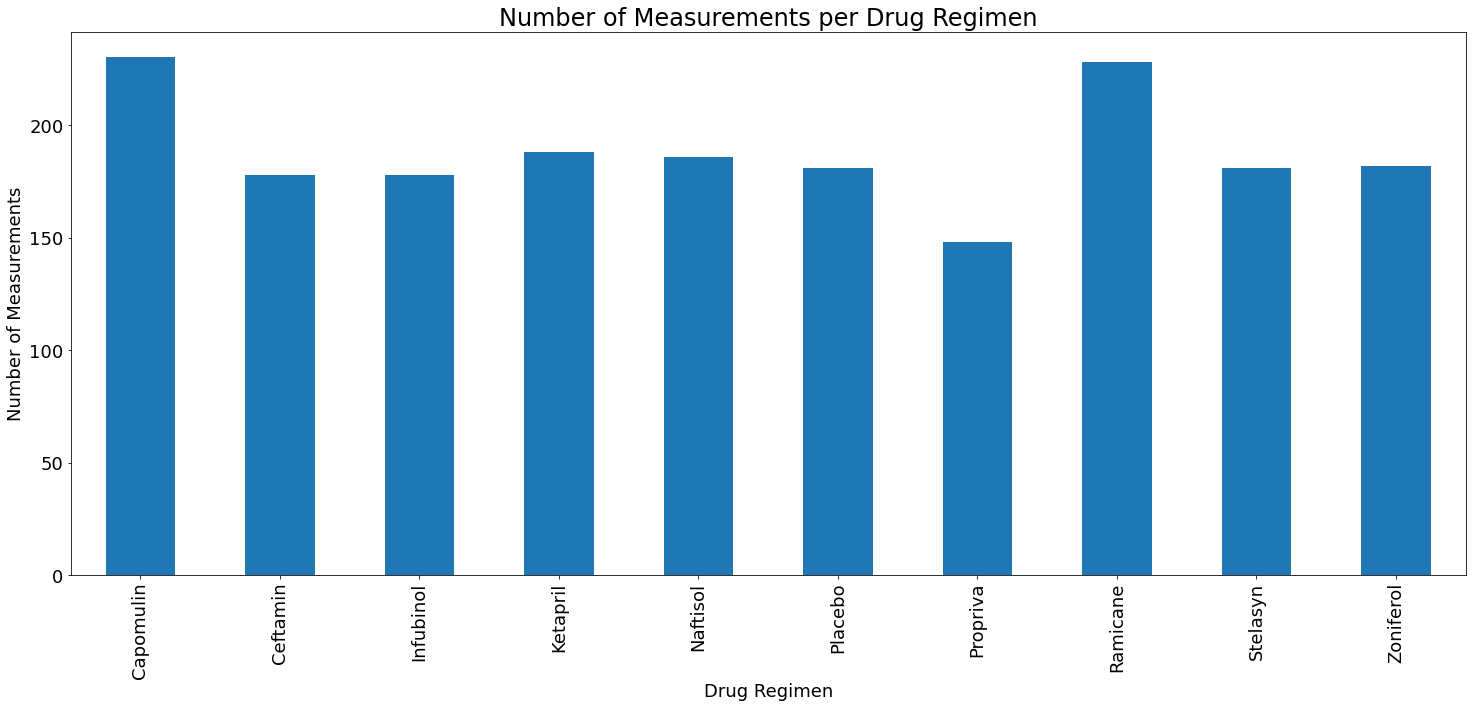

In [18]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#regimen_dp = Regimen_df.count()
Measurements_dp = Regimen_df["Mouse ID"].count()
ax=Measurements_dp.plot.bar(x= "Drug Regimen", figsize=(25,10), fontsize=18)
ax.set_xlabel("Drug Regimen", fontsize= 18)
ax.set_ylabel("Number of Measurements", fontsize = 18)
ax.set_title("Number of Measurements per Drug Regimen", fontsize = 24)

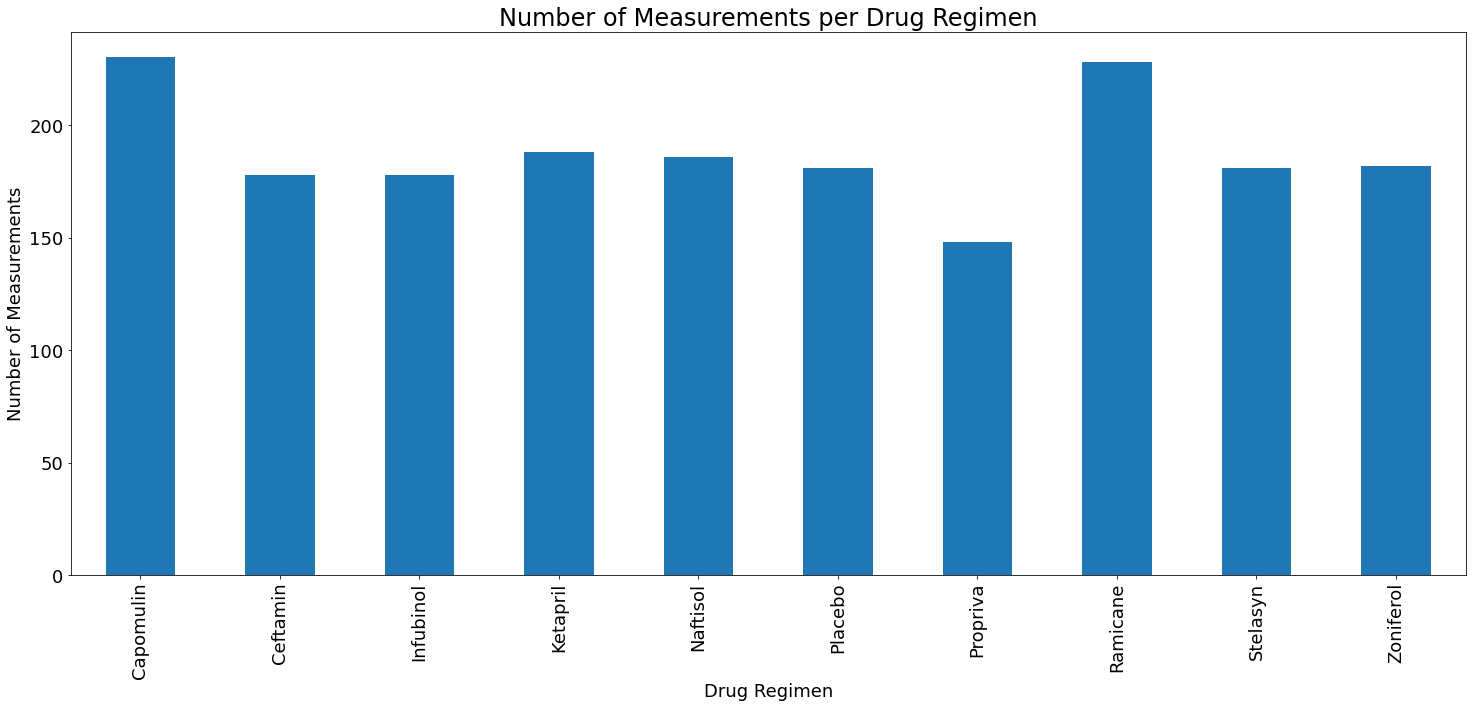

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
Measurements_dp = Regimen_df["Mouse ID"].count()
Measurements_dp.plot(kind="bar", figsize=(25,10), fontsize=18)
plt.xlabel("Drug Regimen", fontsize=18)
plt.ylabel("Number of Measurements", fontsize=18)
plt.title("Number of Measurements per Drug Regimen", fontsize = 24)
plt.show()

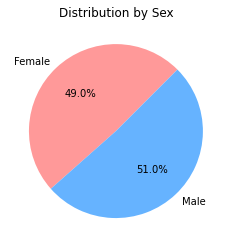

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

plot = clean_dataset.groupby("Sex").size().plot.pie(autopct="%1.1f%%", colors =('#ff9999','#66b3ff'), startangle=45, title="Distribution by Sex")
plot.set_ylabel('')
plt.show()

Text(0.5, 1.0, 'Distribution by Sex')

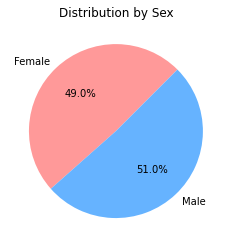

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = clean_dataset.groupby("Sex").size()
plt.pie(sex, labels=sex.index.values, autopct="%1.1f%%", colors =('#ff9999','#66b3ff'), startangle = 45)
plt.title('Distribution by Sex')

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = pd.DataFrame(clean_dataset.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index().rename(columns={"Timepoint": "Last Timepoint"})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume = pd.merge(clean_dataset, last_timepoint, on = "Mouse ID")
tumor_volume


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ("Ramicane", "Capomulin", "Infubinol", "Ceftamin")

# Create empty list to fill with tumor vol data (for plotting)
Tumor_volume=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in Treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_df = tumor_volume.loc[tumor_volume["Drug Regimen"] == regimen]
    
    # add subset
    last_volume = regimen_df.loc[regimen_df["Timepoint"]==regimen_df["Last Timepoint"]]
    last_volumes = last_volume["Tumor Volume (mm3)"]
    Tumor_volume.append(last_volumes)
    
    # Determine outliers using upper and lower bounds
    volume = last_volume["Tumor Volume (mm3)"]
    quartiles = volume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    IQR = upperq - lowerq
    lowerb = lowerq - (1.5*IQR)
    upperb = upperq + (1.5*IQR)
    Outliers = (volume.loc[(last_volume["Tumor Volume (mm3)"] >= upperb) |
                (last_volume['Tumor Volume (mm3)'] <= lowerb)]).count()
    print(f"{regimen}: {Outliers}")

Ramicane: 0
Capomulin: 0
Infubinol: 1
Ceftamin: 0


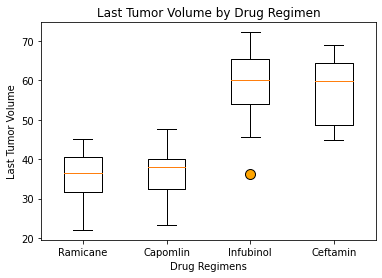

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outliers_props = dict(markerfacecolor="orange",markersize=10)
plt.boxplot(Tumor_volume, flierprops=outliers_props)
plt.xticks([1,2,3,4,],["Ramicane", "Capomlin", "Infubinol", "Ceftamin"])
plt.xlabel("Drug Regimens")
plt.ylabel("Last Tumor Volume")
plt.title("Last Tumor Volume by Drug Regimen")

plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume vs Time for a mouse treated with Capomulin')

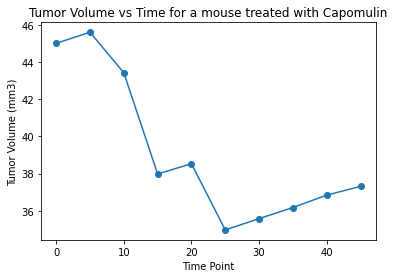

In [77]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Select a random mouse from the Capomulin Treatment
Capomulin_mice = clean_dataset.loc[clean_dataset["Drug Regimen"] == "Capomulin"]
Capomulin_mice.sample()
Capomulin_mouse = clean_dataset.loc[clean_dataset["Mouse ID"] == "i738"]

#Line Chart
plt.plot(Capomulin_mouse["Timepoint"], Capomulin_mouse["Tumor Volume (mm3)"], marker = "o")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Time for a mouse treated with Capomulin")

Text(0.5, 1.0, 'Average Tumor Volume vs Mouse Weight for the Capomulin regimen')

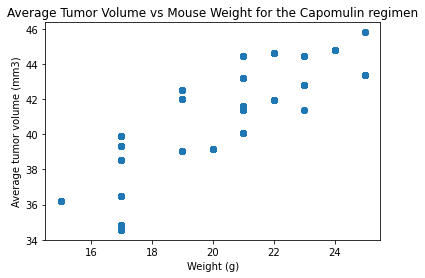

In [81]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_vol = pd.DataFrame (Capomulin_mice.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()).rename(columns={"Tumor Volume (mm3)": "Average Volume"}).reset_index()
Capomulin_avg_vol = pd.merge(Capomulin_mice, avg_vol, on = "Mouse ID")
plt.scatter(Capomulin_avg_vol["Weight (g)"], Capomulin_avg_vol["Average Volume"])
plt.xlabel("Weight (g)")
plt.ylabel("Average tumor volume (mm3)")
plt.title("Average Tumor Volume vs Mouse Weight for the Capomulin regimen")

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
